![](https://dgtzuqphqg23d.cloudfront.net/cXQdIg2TbOapkb2Wvvrp3h6MdavNuZCwCkUyOvgXuW0-1536x2048.jpg)

# Analysing my Strava data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/toms-strava-data/activities.csv')

# Cleansing the data

In [3]:
# Dropping unneccsary columns 

df = df.drop(columns=['Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear','Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Average Speed', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence', 'Max Watts', 'Average Watts', 'Max Temperature', 'Average Temperature','Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time', 
       'Downhill Time', 'Other Time', 'Type', 'Weighted Average Power', 'Power Count', 'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Commute.1','Total Weight Lifted', 'From Upload', 'Grade Adjusted Distance',
       'Weather Observation Time', 'Weather Condition', 'Weather Temperature', 'Apparent Temperature', 'Dewpoint', 'Humidity', 'Weather Pressure','Wind Speed', 'Wind Gust', 'Wind Bearing', 'Precipitation Intensity',
       'Sunrise Time', 'Sunset Time', 'Moon Phase', 'Bike', 'Gear', 'Precipitation Probability', 'Precipitation Type', 'Cloud Cover', 'Weather Visibility', 'UV Index', 'Weather Ozone', 'Jump Count', 'Average Flow', 
       'Flagged', 'Average Elapsed Speed','Dirt Distance', 'Newly Explored Distance','Newly Explored Dirt Distance', 'Media', 'Max Heart Rate.1', 'Activity Count', 'Activity Description', 'Total Grit', 'Start Time', 'Perceived Exertion'])

In [4]:
df['Activity Date'] = pd.to_datetime(df['Activity Date'], format=('mixed')) # Converting date column to datetime

df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')             # Converting column to numeric

df.set_index('Activity ID', inplace=True)                                   # Setting the Activity ID as Index

df = df.rename(columns={'Distance': 'Distance_km', 'Moving Time': 'Moving Time (sec)', 
                        'Elapsed Time':'Elapsed Time (sec)', 'Max Heart Rate':'Max Heart Rate (bpm)', 
                        'Average Heart Rate':'Average Heart Rate (bpm)'})   # Renaming Columns

df.drop(index=1454765617, axis='index', inplace=True)                       # Dropping a row that's incorrect

# EDA

## Correlations

In [5]:
fig = px.imshow(df.corr(numeric_only=True).round(2), text_auto=True, aspect='auto', color_continuous_scale='viridis')
fig.update_xaxes(side = "top")
fig.show();

### Strongest correlations:
- #1 - 0.95 - Total Steps x Moving Time (Sec)
- #2 - 0.94 - Total Steps x Distance_km
- #2 - 0.94 - Total Steps x Calories
- #4 - 0.86 - Elevation Loss x Distance
- #5 - 0.85 - Elevation Gain x Distance

## Spread of data for heart rate

In [6]:
heart_rate_present = df[df['Max Heart Rate (bpm)'].notna()]
heart_rate_present['Max Heart Rate (bpm)'].describe()

count    694.000000
mean     176.000000
std       18.122559
min       99.000000
25%      165.000000
50%      177.000000
75%      191.000000
max      212.000000
Name: Max Heart Rate (bpm), dtype: float64

In [7]:
heart_rate_avg = df[df['Average Heart Rate (bpm)'].notna()]
heart_rate_avg['Average Heart Rate (bpm)'].describe()

count    694.000000
mean     140.708361
std       18.331280
min       78.338463
25%      129.103176
50%      138.562897
75%      149.335140
max      192.273254
Name: Average Heart Rate (bpm), dtype: float64

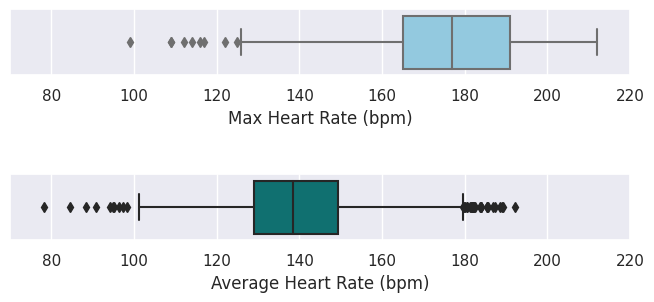

In [8]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 1, figsize=(8, 3))
fig.subplots_adjust(hspace=1.5, wspace=0.125)  

sns.boxplot(x='Max Heart Rate (bpm)', data=df, color='skyblue', ax=axs[0])
axs[0].set_xlim(70, 220) 

sns.boxplot(x='Average Heart Rate (bpm)', data=df, color='teal', ax=axs[1])
axs[1].set_xlim(70, 220)  

plt.show();

## Frequency of activity type

In [9]:
activity_counts = heart_rate_present['Activity Type'].value_counts().reset_index()

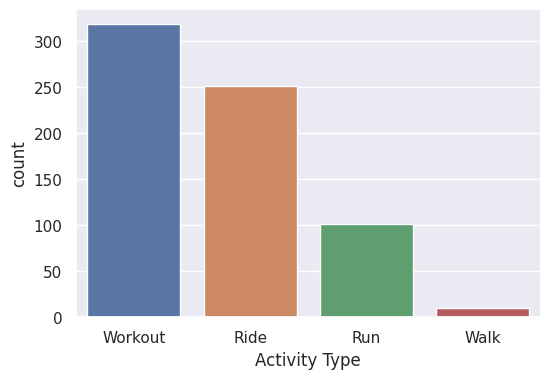

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(x='Activity Type', y='count', data=activity_counts[:4])
plt.show();

## Frequency of activity names

In [11]:
activity_names = df['Activity Name'].value_counts().reset_index()

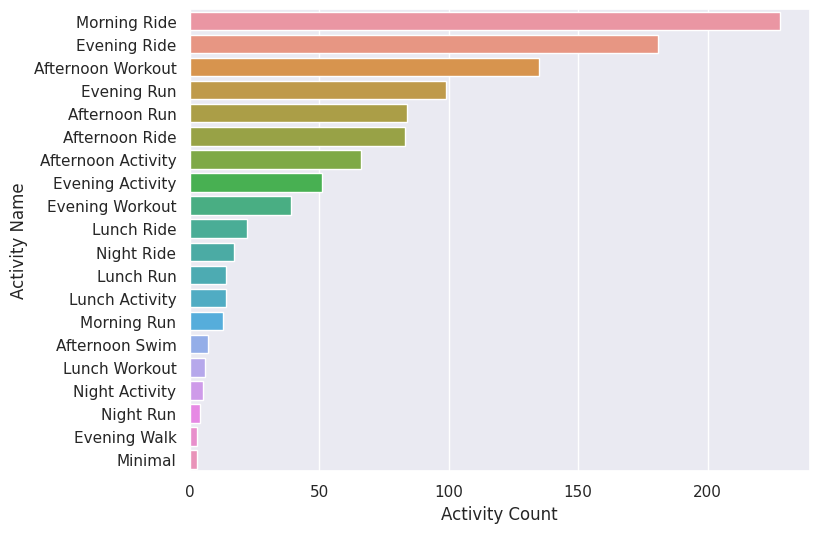

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(y='Activity Name', x='count', data=activity_names[:20])
plt.xlabel('Activity Count')
plt.show();

## Digging into high heart rates and certain activities

- Runs always refers to running activities
- Rides always refer to cycling
- Workouts usually refer to weight lifting, but very occasionally include cardio in it too, either in the form of cycling or runnning. 

### Over 200 bpm

In [13]:
over_200 = df[df['Max Heart Rate (bpm)'] >= 200].sort_values(by='Max Heart Rate (bpm)', ascending= False)
over_200 = over_200['Activity Type'].value_counts().reset_index()

In [14]:
def barplot(data, variable):
    plt.figure(figsize=(5,2))
    sns.barplot(data=data, x='count', y=variable)
    plt.show();

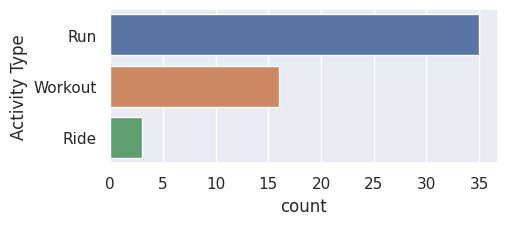

In [15]:
barplot(over_200, 'Activity Type')

### Over 189 bpm

In [16]:
over_189 = df[df['Max Heart Rate (bpm)'] > 189].sort_values(by='Max Heart Rate (bpm)', ascending= False)
over_189 = over_189['Activity Type'].value_counts().reset_index()

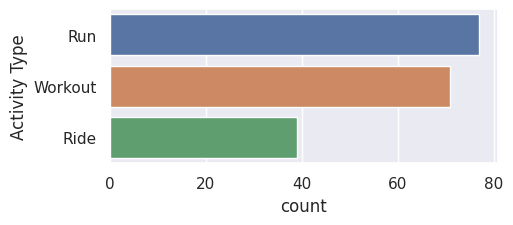

In [17]:
barplot(over_189, 'Activity Type')

## Total distance travelled in all exercises

In [18]:
km = df['Distance_km'].sum()
print(f"""The total distance travelled is {km} kilometers.
This is 52.9 laps around the M25.
Or from Lands End to John O'Groats 5.2 times.
Or from London to Istanbul 3.26 times
Or from London to Hong Kong 1.03 times.
Or 24.85% of the distance around the earth.
Or 1.17% of the distance (384,400 km) from earth to the Moon.""")

The total distance travelled is 9211.18 kilometers.
This is 52.9 laps around the M25.
Or from Lands End to John O'Groats 5.2 times.
Or from London to Istanbul 3.26 times
Or from London to Hong Kong 1.03 times.
Or 24.85% of the distance around the earth.
Or 1.17% of the distance (384,400 km) from earth to the Moon.


## Spread of certain data types

In [19]:
def subplots(data):
    sns.set(style="darkgrid")
    fig, axs = plt.subplots(3, 2, figsize=(9, 9))
    fig.subplots_adjust(hspace=0.125, wspace=0.125)

    sns.histplot(x='Max Heart Rate (bpm)', data=data, bins=50, color='skyblue', kde=True, ax=axs[0, 0])
    sns.histplot(x='Distance_km', data=data, bins=50, color='brown', kde=True, ax=axs[0, 1])
    sns.histplot(x='Average Heart Rate (bpm)', data=data, bins=50, color='teal', kde=True, ax=axs[1, 0])
    sns.histplot(x='Moving Time (sec)', data=data, bins=50, color='olive', kde=True, ax=axs[1, 1])
    sns.histplot(x='Calories', data=data, bins=50, color='red', kde=True, ax=axs[2, 0])
    sns.histplot(x='Average Grade', data=data, bins=50, color='orange', kde=True, ax=axs[2, 1])
    plt.show();

# All activities

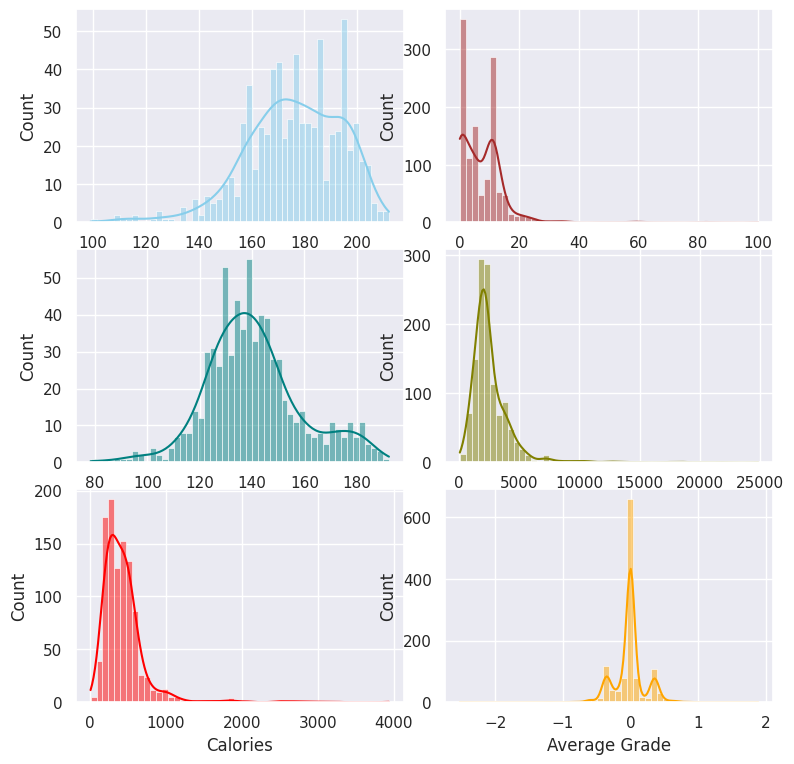

In [20]:
subplots(df)  # All activities

In [21]:
runs = df[df['Activity Type'] == 'Run']
rides = df[df['Activity Type'] == 'Ride']
workouts = df[df['Activity Type'] == 'Workout']

# Runs

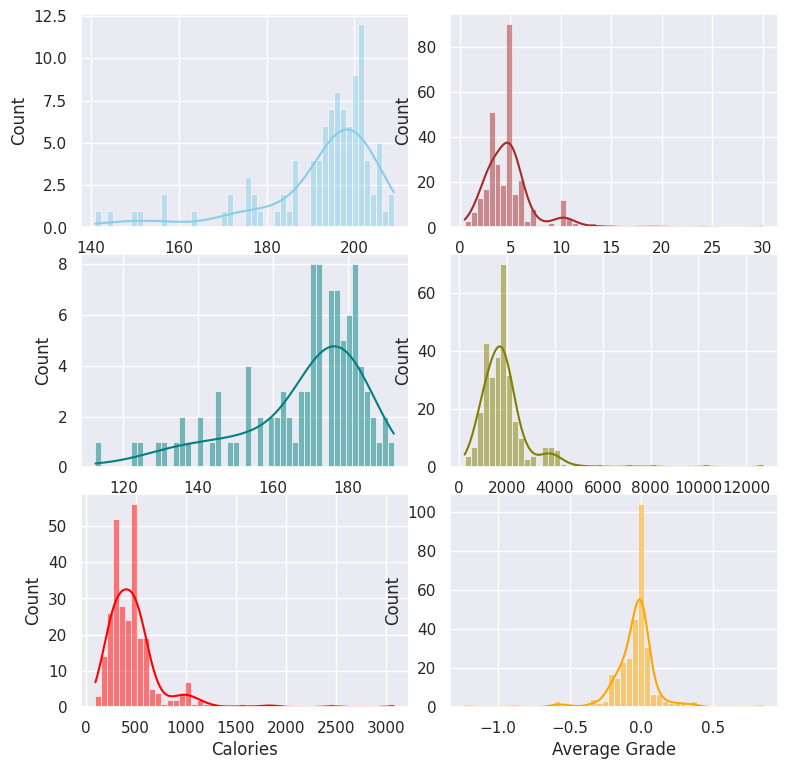

In [22]:
subplots(runs)  # Running activities only

# Cycling

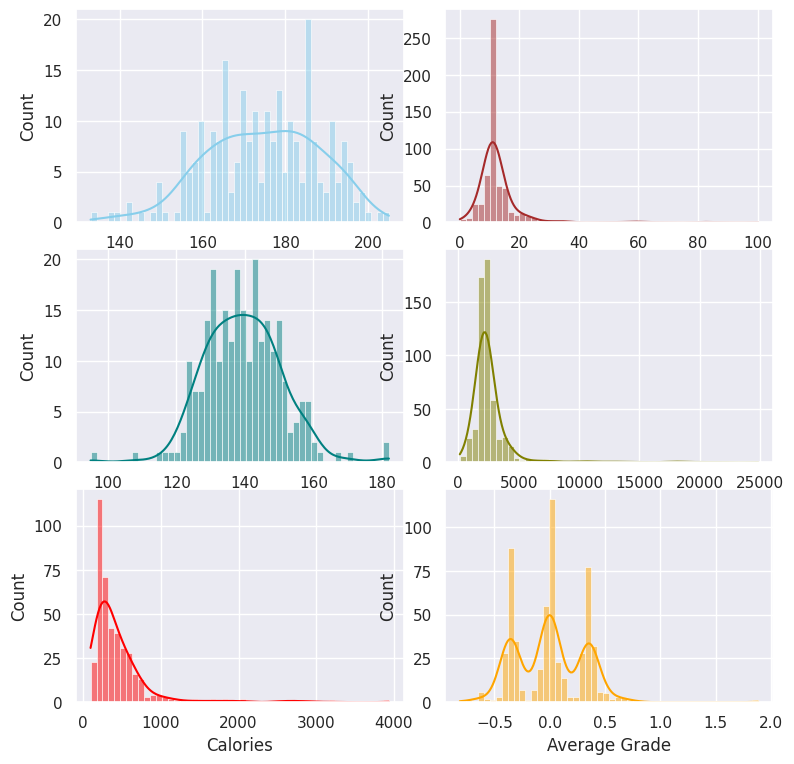

In [23]:
subplots(rides)  # Cycling only

# Workouts

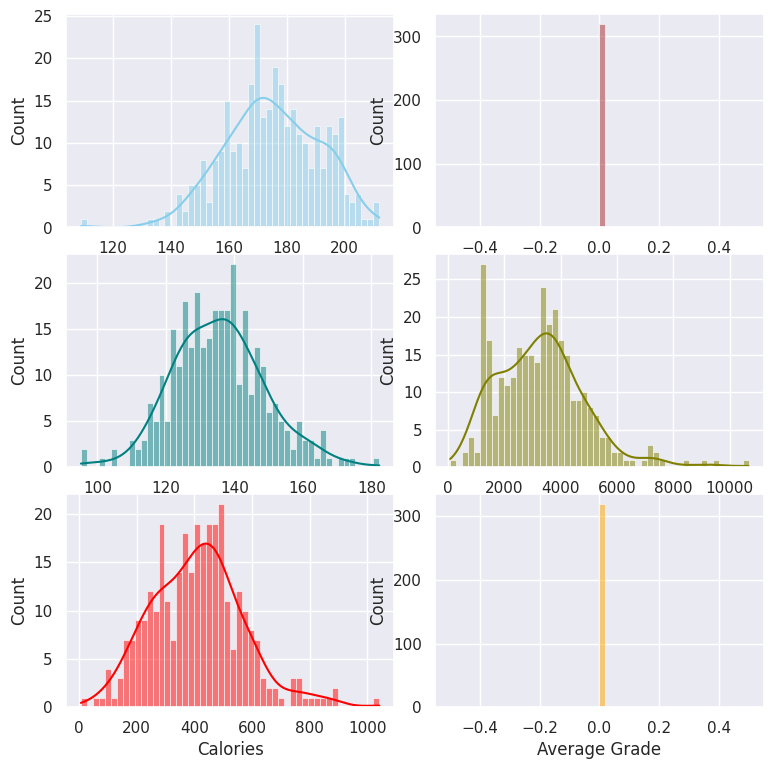

In [24]:
subplots(workouts)